In [77]:
import requests

In [76]:
from IPython.display import Image, display


Pokemon API Wrapper

Create a python wrapper for the Pokemon API. It should take in a pokemon name and display the pokemon with its height and weight.

In [78]:
class PokeAPI:
    def __init__(self, pokemon):
        self.base_url = 'https://pokeapi.co/api/v2/pokemon/'
        self.pokemon = pokemon

    def _get(self):
        request_url = f"{self.base_url}{self.pokemon}"
        poke_res = requests.get(request_url)
        if poke_res.ok:
            return poke_res.json()
        else:
            print("That Pokémon does not exist.")

    def get_name(self):
        pokedata = self._get()
        return f"Pokémon name: {pokedata['name'].title()}"

    def get_height(self):
        pokedata = self._get()
        return f"{pokedata['name'].title()} has a height of: {pokedata['height']}"

    def get_weight(self):
        pokedata = self._get()
        return f"{pokedata['name'].title()} has a weight of: {pokedata['weight']}"
        pass

    def get_sprite(self):
        pokedata = self._get()
        front_sprite = pokedata['sprites']['front_default']
        return front_sprite

    def __str__(self):
        pokedata = self._get()
        return f"{pokedata['name'].title()} has a height of: {pokedata['height']} and a weight of {pokedata['weight']}."

In [81]:
def main():
    while True:
        pokemon = input("Enter the Pokémon you want information about or enter 'quit' to quit: ").lower()
        if pokemon == 'quit':
            break

        pokeclient = PokeAPI(pokemon)
        restart = False
        
        while True:

            data = input(f"What data would you like about {pokemon.title()}? (height/weight/sprite/list) ").lower()
            
            while data not in {'height', 'weight', 'sprite', 'list'}:
                data = input("Please enter a valid request: (height/weight/sprite/list/quit) ")
                continue

            if data == 'height':
                print(pokeclient.get_height())
            elif data == 'weight':
                print(pokeclient.get_weight())
            elif data == 'list':
                print(pokeclient)
            elif data == 'sprite':
                display(Image(pokeclient.get_sprite()))
            elif data == 'quit':
                break

            restart = input("Would you like to enter a new Pokémon? (y/n/quit) ")
            if restart == 'y':
                break
            elif restart == 'quit':
                break
        if restart == 'quit':
            break




Vulpix has a height of: 6 and a weight of 99.


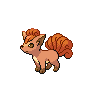

Mawile has a height of: 6 and a weight of 115.


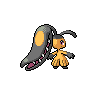

Bulbasaur has a height of: 7 and a weight of 69.


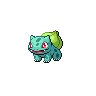

Ditto has a height of: 3 and a weight of 40.


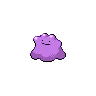

In [82]:
main()